Temporary jupyter notebook file to look at the data in canada.csv

In [58]:
# Setup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly_express as px

# Load data
canada_origdata = pd.read_csv("data/canada.csv").drop(
    ["region","notes", "_merge"], axis="columns"
)

# List of columns
# ['Unnamed: 0', 'ID', 'Name', 'HashName', 'Sex', 'Age', 'Height',
#       'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport',
#       'Event', 'Medal', 'region', 'notes', '_merge']

#columnnames = [column for column in canada_origdata.columns if column != "Sport"]
#print(columnnames)
#np.sort(canada_origdata["Games"].unique())
#canada_origdata.head()

In [41]:
# Useful functions to be added to functionsfile or class file later

def count_medals(df_orig, column_name):
    """
    Gives back number of medals per any attribute

    Input:
        df_orig: DataFrame
        column_name: column to get top values of
    
    Returns:
        df_best: new DataFrame
    """
    
    # Remove all rows with NaNs (no medals are NaN)
    df_best = df_orig.dropna(axis="rows")

    # Adds a counter-column for number of medals
    df_best["Number medals"] = 1

    # Groupby chosen column_name
    # Count number of medals and sort by number of medals
    df_best = df_best.groupby(column_name).sum().sort_values("Number medals", ascending=False)
    
    # Remove redundant columns
    df_best = df_best.drop(
        [column for column in df_best.columns if column != "Number medals"],
        axis="columns"
    )

    # Give back new dataframe
    return df_best

# TODO: a bar plot function? (is it necessary? with px it's already very short)


/tmp/ipykernel_11690/869149441.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Number medals
Sport,
Ice Hockey,281
Rowing,141
Swimming,89
Athletics,82
Short Track Speed Skating,70


In [46]:

canada_bestsports = count_medals(canada_origdata, "Sport")

canada_bestsports.head()

fig = px.bar(canada_bestsports.head(10), y=canada_bestsports.columns[0],
    labels={canada_bestsports.index.name:""}
).show()


/tmp/ipykernel_11690/869149441.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:

canada_bestolympics = count_medals(canada_origdata, "Games")

canada_bestolympics.head(10)

fig = px.bar(canada_bestolympics, y=canada_bestolympics.columns[0],
    labels={canada_bestolympics.index.name:""}
).show()


/tmp/ipykernel_11690/869149441.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
canada_bestages = count_medals(canada_origdata, "Age")

canada_bestages.head()

fig = px.bar(canada_bestages, y=canada_bestages.columns[0]
).show()


/tmp/ipykernel_11690/869149441.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     Number medals
Sex               
M              555
F              505


/tmp/ipykernel_11690/869149441.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



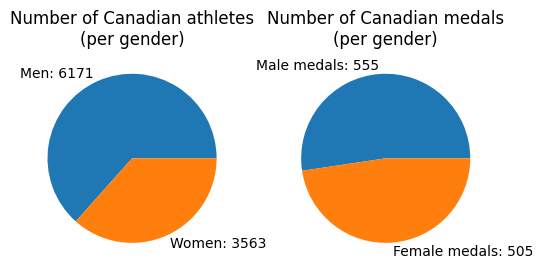

In [74]:
# Distribution of male vs female
Nmen = sum(canada_origdata["Sex"] == "M")
Nwomen = sum(canada_origdata["Sex"] == "F")

# Number of medals per sex
canada_bestsex = count_medals(canada_origdata,"Sex")

Nmale_medals = canada_bestsex.loc["M"][0]
Nfemale_medals = canada_bestsex.loc["F"][0]

# Output
print(canada_bestsex.head())

# Plot
fig,(ax1,ax2) = plt.subplots(1,2, dpi=100, facecolor='white')

ax1.pie([Nmen, Nwomen], 
    labels=[f"Men: {Nmen}", f"Women: {Nwomen}"]
);
ax1.title.set_text("Number of Canadian athletes\n(per gender)")

ax2.pie(
    [Nmale_medals, Nfemale_medals], 
    labels=[f"Male medals: {Nmale_medals}", f"Female medals: {Nfemale_medals}"]
);
ax2.title.set_text("Number of Canadian medals\n(per gender)")


### Idéer

Vad mer kan vi plotta? Nu har jag fokuserat på antal medaljer per diverse.

- Antal atleter per år

- ...